# TASK 1: Prediction using Supervised ML

## Sub-task1: What will be the predicted score if a student studies for 9.25 hours/day?

By : Annie Dhawan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [3]:
data=pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


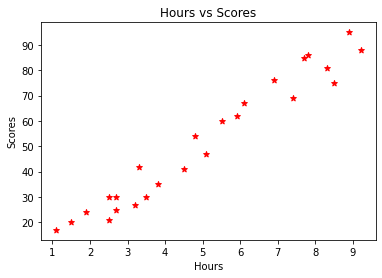

In [8]:
plt.scatter(x='Hours',y='Scores',data=data,color='red',marker='*')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### There is a positve correlation between Hours and scores. Hence more the number of study hours more will be the score.

# Applying Linear Regression

In [9]:
X=data.drop('Scores',axis=1)
y=data['Scores']

Now Splitting the data into test and train data

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

importing the linear regression model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
#creating the object
hours_model=LinearRegression()
hours_model.fit(x_train,y_train)

y_predict=hours_model.predict(x_test)

In [13]:
pred=pd.DataFrame()
pred['Actual Scores']=y_test
pred['Predicted Scores']=y_predict.round(2)

In [14]:
pred.reset_index(drop=True,inplace=True)

In [15]:
pred.head()

,Actual Scores,Predicted Scores
0,69,74.34
1,60,55.99
2,67,61.79
3,47,52.13
4,95,88.82


In [16]:
y_full_pred=hours_model.predict(X)

Plotting the fitted line

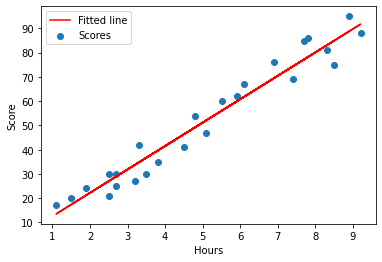

In [17]:
plt.scatter(x='Hours',y='Scores',data=data)
plt.plot(X,y_full_pred,color='red',label='Fitted line')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

#  Predicting Score for a 9.25 of Study Hours

In [18]:
hour=float(input('Enter the number of study hours: '))
b=np.array(hour).reshape(-1,1)
score_pred=hours_model.predict(b)
print('If you will study for',hour,'hours, your scores will be :',score_pred[0].round(2))

Enter the number of study hours: 9.25
If you will study for 9.25 hours, your scores will be : 92.2


# Error

In [19]:
from sklearn.metrics import mean_squared_error

In [24]:
error=np.sqrt(mean_squared_error(y_test,y_predict))

In [25]:
error

5.2195931435100364